In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("C:\\Users\\armin\\Downloads\\IBM_data-science\\Kaggle-datasets\\Diabetes\\diabetes.csv")
print(df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

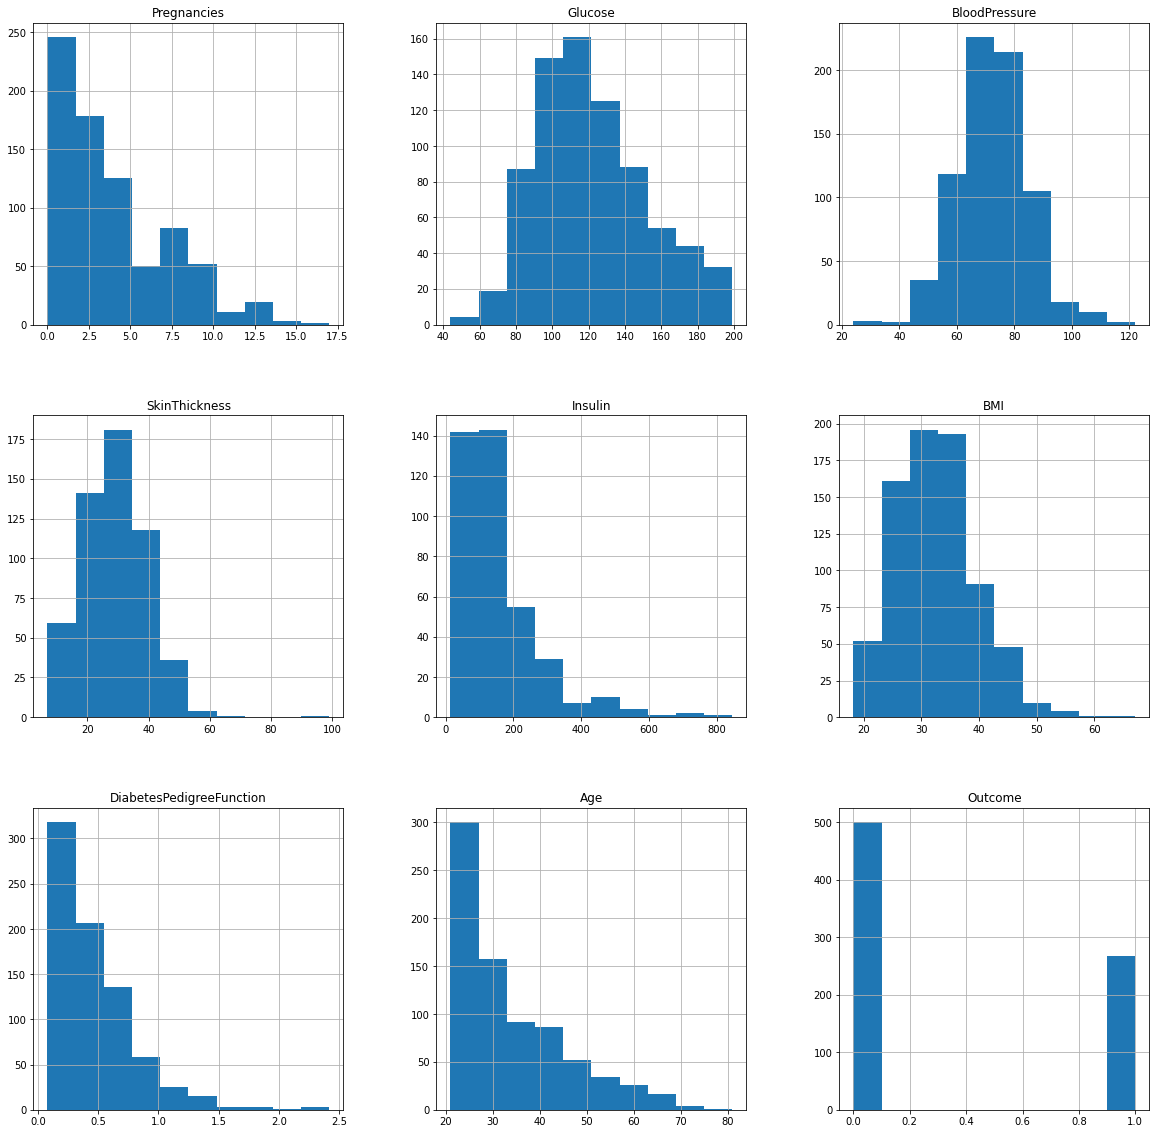

In [6]:
columns = ["Glucose", "BloodPressure", "SkinThickness" , "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
df[columns] = df[columns].replace(0, np.nan)

df.hist(figsize=(20,20))

In [7]:
#Skewed features replaced by median, normally distributed replace with mean
print(df.isnull().sum())
df.corr()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


In [8]:
#Less data means less accurate model (should not purely just )
#Replacing insulin with mean however may not be appropriate due to strong correlation and insufficient amount of data on it
#Thus, it is best to drop the column

#We could also figure out the mean of the neighbours which have insulin values

#This is what was done in solution
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [84]:
#Normalize data for KNN by dividing each column by max.

df["Pregnancies"] = df["Pregnancies"] / df["Pregnancies"].max()
for col in columns:
    df[col] = df[col] / df[col].max()

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.147754,0.500745,0.259091,0.617284,1
1,0.058824,0.427136,0.540984,0.292929,0.147754,0.396423,0.145041,0.382716,0
2,0.470588,0.919598,0.524590,0.292929,0.147754,0.347243,0.277686,0.395062,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.777778,0
764,0.117647,0.613065,0.573770,0.272727,0.147754,0.548435,0.140496,0.333333,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.370370,0
766,0.058824,0.633166,0.491803,0.292929,0.147754,0.448584,0.144215,0.580247,1


In [101]:
#Create model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score, accuracy_score
from sklearn.model_selection import train_test_split

train_score = []
test_score = []

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

for i in range(1,70):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)

    plt.hist()

    train_score.append(accuracy_score(train_pred, y_train))
    test_score.append(accuracy_score(test_pred, y_test ))

C:\Users\armin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\armin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy score')

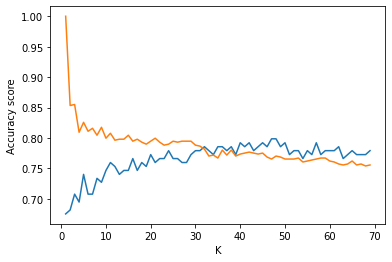

In [102]:
index = test_score.index(max(test_score))

sns.lineplot(range(1, 70), y=test_score)
sns.lineplot(range(1, 70), y=train_score)
plt.xlabel("K")
plt.ylabel("Accuracy score")

In [103]:
print("Optimal K:", index)
print("KNN Accuracy Score:", max(test_score))

Optimal K: 46
KNN Accuracy Score: 0.7987012987012987


Now lets use a Logistic Regression model for prediction

In [88]:
from sklearn.linear_model import LogisticRegression

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

prob = model.predict_proba(X_test)

prob

array([[0.70280575, 0.29719425],
       [0.78850941, 0.21149059],
       [0.84113845, 0.15886155],
       [0.72808475, 0.27191525],
       [0.51786444, 0.48213556],
       [0.591068  , 0.408932  ],
       [0.95744598, 0.04255402],
       [0.64635231, 0.35364769],
       [0.50338679, 0.49661321],
       [0.36793489, 0.63206511],
       [0.70304679, 0.29695321],
       [0.2066703 , 0.7933297 ],
       [0.60016435, 0.39983565],
       [0.71534028, 0.28465972],
       [0.8827154 , 0.1172846 ],
       [0.64352198, 0.35647802],
       [0.83786722, 0.16213278],
       [0.86842597, 0.13157403],
       [0.38727321, 0.61272679],
       [0.59035589, 0.40964411],
       [0.74605471, 0.25394529],
       [0.86768002, 0.13231998],
       [0.49009789, 0.50990211],
       [0.86740416, 0.13259584],
       [0.50288215, 0.49711785],
       [0.22951732, 0.77048268],
       [0.82163473, 0.17836527],
       [0.92234825, 0.07765175],
       [0.73653379, 0.26346621],
       [0.84226662, 0.15773338],
       [0.

In [108]:
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, model.predict(X_test)))

Logistic Regression Accuracy Score: 0.7987012987012987


In [110]:
from sklearn.metrics import confusion_matrix

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, model.predict(X_test), labels=(1,0) )), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ValueError: 'YlGrBu' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

Both models share similar performance, with an accuracy of approx. 80%